ANN with Tensorflow and Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.regularizers import l2

In [3]:
# Define paths for your dataset
train_dir = '/content/drive/MyDrive/2023MachineVisionHappyMonday/Week5/MV_Seminar Week 5/data_mv/data_mv/train'
test_dir = '/content/drive/MyDrive/2023MachineVisionHappyMonday/Week5/MV_Seminar Week 5/data_mv/data_mv/test'

In [4]:
# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Specify the validation split here
    fill_mode='nearest'
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training and testing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical'
)

Found 39 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [6]:
# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [ ]:
# # # # Build a neural network model
# model = Sequential([
#     Flatten(input_shape=(128, 128, 3)),
#     Dense(1000, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.2),
#     Dense(900, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(800, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(700, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(600, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(500, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(400, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(300, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(200, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(100, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(50, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(10, activation='LeakyReLU'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(3, activation='softmax')
# ])

In [7]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [8]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Fit the model for training
history = model.fit(train_generator,  validation_data = validation_generator, epochs=100)

Epoch 1/100
5/5 [==============================] - 17s 3s/step - loss: 1.3429 - accuracy: 0.3333 - val_loss: 1.1070 - val_accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 1s 251ms/step - loss: 1.1050 - accuracy: 0.3590 - val_loss: 1.0925 - val_accuracy: 0.3333
Epoch 3/100
5/5 [==============================] - 1s 260ms/step - loss: 1.1091 - accuracy: 0.3077 - val_loss: 1.0889 - val_accuracy: 0.3333
Epoch 4/100
5/5 [==============================] - 1s 264ms/step - loss: 1.0898 - accuracy: 0.4872 - val_loss: 1.0874 - val_accuracy: 0.4444
Epoch 5/100
5/5 [==============================] - 1s 255ms/step - loss: 1.1041 - accuracy: 0.3590 - val_loss: 1.0732 - val_accuracy: 0.5556
Epoch 6/100
5/5 [==============================] - 2s 389ms/step - loss: 1.0553 - accuracy: 0.5128 - val_loss: 1.0541 - val_accuracy: 0.3333
Epoch 7/100
5/5 [==============================] - 2s 399ms/step - loss: 1.0330 - accuracy: 0.4615 - val_loss: 0.9984 - val_accuracy: 0.7778
Epoch 8/100
5/5

In [10]:
# Save the trained model
model.save('CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0.5, 1.0, 'Training and Validation Accuracy')

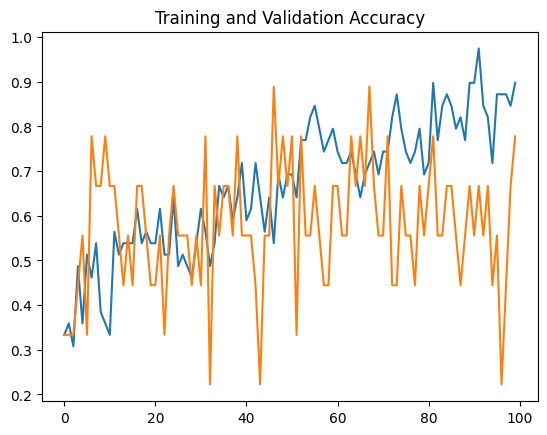

In [11]:
# Plot the training and validation Accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

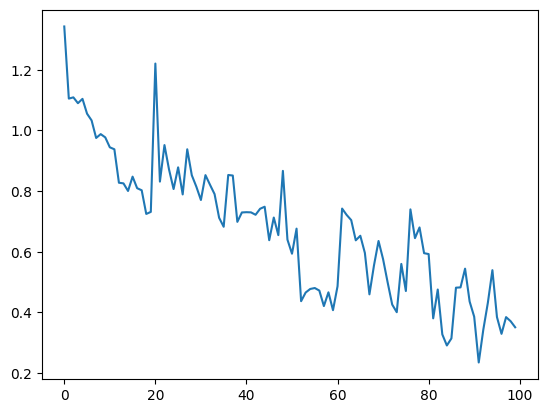

In [12]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.show()

In [13]:
# Load the trained model
model = load_model('CNN_model.h5')  # Replace with the path to your trained model file

In [14]:
# Make predictions on the test data
predictions = model.predict(test_generator)
# 'predictions' will contain the predicted probabilities for each class for each sample in the test data

3/3 [==============================] - 6s 3s/step


In [15]:
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(20):  # Display the first 5 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.